<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/Integraci%C3%B3n_y_EDOs_Runge_Kutta_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integración Numerica

In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import scipy.integrate as integrate

In [ ]:
import sympy as sp
from scipy import integrate

x = sp.symbols('x')
f = sp.exp(x)
func = sp.lambdify(x,f)

result, error = integrate.quad(func, 0, 2)

print("Resultado:", result)
print("Error estimado:", error)


Resultado: 6.3890560989306495
Error estimado: 7.093277186654589e-14


#Sirve para la integración normal y las demás

In [ ]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
def fdp_normal_estandar(z):
    return np.exp(-0.5*z**2)/np.sqrt(2*np.pi);
f=lambda x : fdp_normal_estandar(x)
I = integrate.quad(f,0,1.21)
I[0]



0.3868605535560227

#**Hacer la tablita de distribución estandar**

In [ ]:
import numpy as np
from scipy import integrate

def fdp_normal_standar(z):
    return np.exp(-0.5*z**2)/np.sqrt(2*np.pi)

f = lambda x: fdp_normal_standar(x)
I = integrate.quad(f, -3, 3)

col0 = np.arange(0, 4.1, 0.1)
fil0 = np.arange(0, 0.1, 0.01)

nc = fil0.size
nf = col0.size
N = np.zeros((nf + 1, nc + 1))

N[1:, 0] = col0
N[0, 1:] = fil0

for i in range(1, nf + 1):
    for j in range(1, nc + 1):
        z = N[i, 0] + N[0, j]
        N[i, j] = integrate.quad(f, 0, z)[0]

print("Matriz N:")
print(N)



Matriz N:
[[0.00000000e+00 0.00000000e+00 1.00000000e-02 2.00000000e-02
  3.00000000e-02 4.00000000e-02 5.00000000e-02 6.00000000e-02
  7.00000000e-02 8.00000000e-02 9.00000000e-02]
 [0.00000000e+00 0.00000000e+00 3.98935631e-03 7.97831372e-03
  1.19664734e-02 1.59534369e-02 1.99388058e-02 2.39221827e-02
  2.79031702e-02 3.18813720e-02 3.58563926e-02]
 [1.00000000e-01 3.98278373e-02 4.37953125e-02 4.77584260e-02
  5.17167867e-02 5.56700048e-02 5.96176924e-02 6.35594629e-02
  6.74949317e-02 7.14237159e-02 7.53454347e-02]
 [2.00000000e-01 7.92597094e-02 8.31661635e-02 8.70644226e-02
  9.09541151e-02 9.48348717e-02 9.87063257e-02 1.02568113e-01
  1.06419873e-01 1.10261248e-01 1.14091881e-01]
 [3.00000000e-01 1.17911422e-01 1.21719522e-01 1.25515835e-01
  1.29300019e-01 1.33071736e-01 1.36830651e-01 1.40576433e-01
  1.44308755e-01 1.48027292e-01 1.51731727e-01]
 [4.00000000e-01 1.55421742e-01 1.59097026e-01 1.62757273e-01
  1.66402179e-01 1.70031446e-01 1.73644780e-01 1.77241890e-01
  1.80

Runge Kutta

In [ ]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr
# Runge Kutta de 4do orden
def Runge_Kutta_4(f,t0,y0,h,n):
    tamano = n + 1
    ty = np.zeros((n,2))

    # incluye el punto [x0,y0]
    ty[0] = [t0,y0]
    ti = t0
    yi = y0
    for i in range(1,n):
        K1 = h * f(ti,yi)
        K2 = h * f(ti+h/2, yi + K1/2)
        K3 = h * f(ti+h/2, yi + K2/2)
        K4 = h * f(ti+h, yi + K3)

        yi = yi + (1/6)*(K1+2*K2+2*K3 +K4)
        ti = ti + h

        ty[i] = [ti,yi]
    return(ty)
t,y,dy=sp.symbols('t,y,dy')
f=sp.parse_expr(input('Digita la EDO. dy=f(t,y)= '));
y0=float(input('Digita y0 = '));
t0=float(input('Digita el tiempo inicial t0 = '));
tn=float(input('Digita el tiempo final tn = '));
h=float(input('Digita h = '));
#ti=t0+i*h --> tn=t0+n*h
n=int((tn-t0)/h)+1;

#f=sp.solve(EDO,dy)

#f=lambda t,y : f(t,y)
f=sp.lambdify((t,y),f)
print(f, f(t0,y0))
sol=Runge_Kutta_4(f,t0,y0,h,n)
print(sol)
#y+1-t**2
#.5
#0
#2
#.5

t_vals = sol[:,0]
y_vals = sol[:,1]
plt.plot(t_vals, y_vals, '*k')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Grafico de y en funcion de t')



Digita la EDO. dy=f(t,y)= y+1-t**2
Digita y0 = .5
Digita el tiempo inicial t0 = 0
Digita el tiempo final tn = 2
Digita h = .5
<function _lambdifygenerated at 0x7f31d4d704c0> 1.5
[[0.         0.5       ]
 [0.5        1.42513021]
 [1.         2.63960266]
 [1.5        4.00681897]
 [2.         5.30160523]]


Digita la EDO. dy=f(t,y)= y+1-t**2
Digita y0 = .5
Digita el tiempo inicial t0 = 0
Digita el tiempo final tn = 2
Digita h = .5
<function _lambdifygenerated at 0x7f31b58115a0> 1.5
[[0.         0.5       ]
 [0.5        1.42513021]
 [1.         2.63960266]
 [1.5        4.00681897]
 [2.         5.30160523]]
[-0.05905034 -0.00498015  0.68949282  1.51414034  0.5       ]


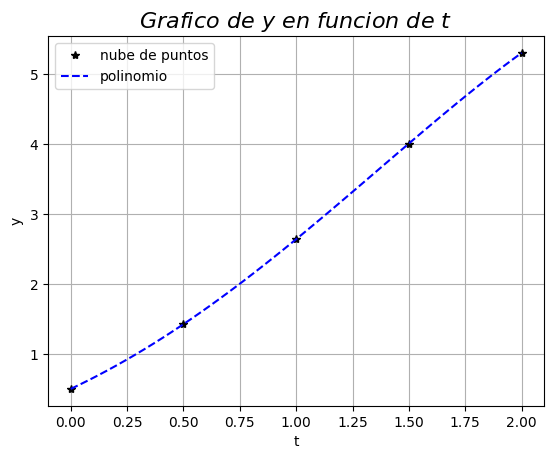

In [ ]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr
# Runge Kutta de 4do orden
def Runge_Kutta_4(f,t0,y0,h,n):
    tamano = n + 1
    ty = np.zeros((n,2))

    # incluye el punto [x0,y0]
    ty[0] = [t0,y0]
    ti = t0
    yi = y0
    for i in range(1,n):
        K1 = h * f(ti,yi)
        K2 = h * f(ti+h/2, yi + K1/2)
        K3 = h * f(ti+h/2, yi + K2/2)
        K4 = h * f(ti+h, yi + K3)

        yi = yi + (1/6)*(K1+2*K2+2*K3 +K4)
        ti = ti + h

        ty[i] = [ti,yi]
    return(ty)
t,y,dy=sp.symbols('t,y,dy')
f=sp.parse_expr(input('Digita la EDO. dy=f(t,y)= '));
y0=float(input('Digita y0 = '));
t0=float(input('Digita el tiempo inicial t0 = '));
tn=float(input('Digita el tiempo final tn = '));
h=float(input('Digita h = '));
#ti=t0+i*h --> tn=t0+n*h
n=int((tn-t0)/h)+1;

#f=sp.solve(EDO,dy)

#f=lambda t,y : f(t,y)
f=sp.lambdify((t,y),f)
print(f, f(t0,y0))
sol=Runge_Kutta_4(f,t0,y0,h,n)
print(sol)
t=sol[:,0]
y=sol[:,1]

ejex=np.linspace(min(t),max(t))
coef_P=np.linalg.inv(np.vander(t))@y #Coeficientes del Polinomio de Interpolación
print(coef_P)
P=np.polyval(coef_P,ejex) # Pn(ejex)
plt.plot(t,y,'*k',label='nube de puntos')
plt.plot(ejex,P,'b--',label='polinomio')
plt.xlabel('t')
plt.ylabel('y')
plt.title(r'$Grafico\ de\ y\ en\ funcion\ de\ t$', fontsize=16)
plt.grid()
plt.legend()

#EDOs con python
# solve_ivp
# **parametros**
    solve_ivp(EDO,[t0 ,tn],[y0,0])

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.980e-04  1.098e-02  1.108e-01  8.107e-01
             1.945e+00  2.000e+00]
        y: [[ 5.000e-01  5.015e-01 ...  5.175e+00  5.306e+00]
            [ 0.000e+00  9.985e-04 ...  1.680e+00  1.611e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0


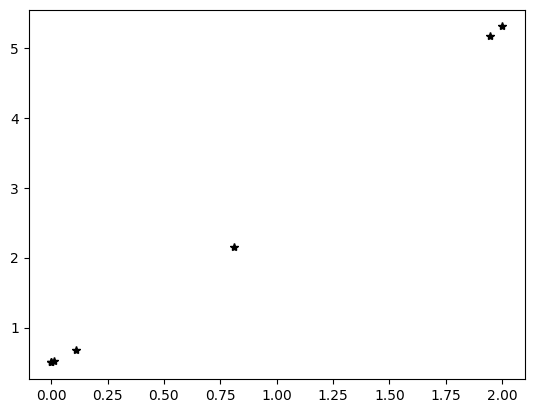

In [ ]:
from scipy.integrate import odeint, solve_ivp

EDO = lambda t,y: y+1-t**2 #t+1] #una literalmente, varias en una lista
sol_ivp = solve_ivp(EDO,[0,2],[.5,0])
print(sol_ivp)
t = sol_ivp.t
y = sol_ivp.y
# print(t,'\n\n',y)
plt.plot(t,y[0,:],'*k')

#EDOs con python
# ideint(EDO,[yo,0],[t0,tn],tfirst=True)

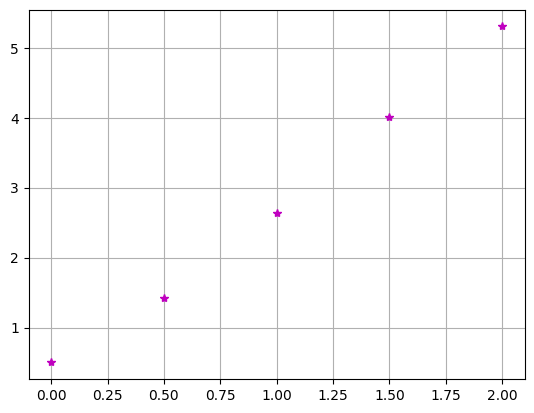

In [ ]:
EDO = lambda t,y: y+1-t**2 #t+1] #una literalmente, varias en una lista
T = np.arange(0,2.1,0.5)
sol_odeint = odeint(EDO,.5,T,tfirst=True)
plt.plot(T,sol_odeint[:,0], '*m')
plt.grid(True)

#EJERCICIOS
##**Atractor de Lorenz**
referencia: https://es.wikipedia.org/wiki/Atractor_de_Lorenz

\begin{align*}
\frac{dx}{dt} &= a(y - x) \\
\frac{dy}{dt} &= x(b - z) - y \\
\frac{dz}{dt} &= xy - cz \\
\end{align*}


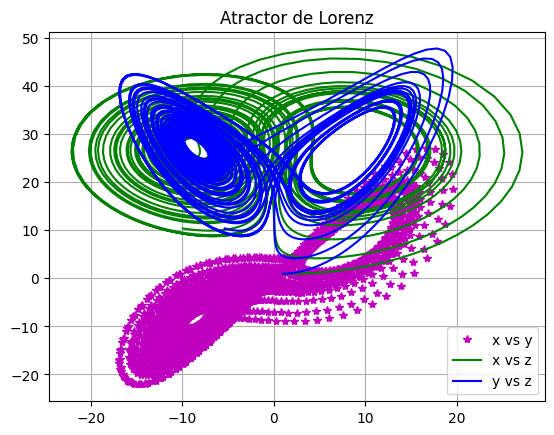

[[ 1.          1.          1.        ]
 [ 1.01256574  1.25992001  0.98489104]
 [ 1.04882146  1.52400084  0.97311434]
 ...
 [-4.50670743 -8.37607864 10.02465404]
 [-4.91100152 -9.13134989 10.16754395]
 [-5.35152405 -9.94522389 10.38289606]]


In [ ]:
EDO = lambda t,y: [10*(y[1]-y[0]) ,y[0]*(28-y[2])-y[1], y[0]*y[1]-8*y[2]/3] #y es un vector y=[x,y,z]- [y[0],y[1],y[2]]
T = np.arange(0,40,0.01)
sol_odeint = odeint(EDO,[1,1,1],T,tfirst=True)
plt.title('Atractor de Lorenz')
plt.plot(sol_odeint[:, 0], sol_odeint[:, 1], '*m', label='x vs y')
plt.plot(sol_odeint[:, 1], sol_odeint[:, 2], 'g', label = 'x vs z')
plt.plot(sol_odeint[:, 0], sol_odeint[:, 2], 'b', label = 'y vs z')
plt.grid(True)
plt.legend()
plt.show()
print(sol_odeint)

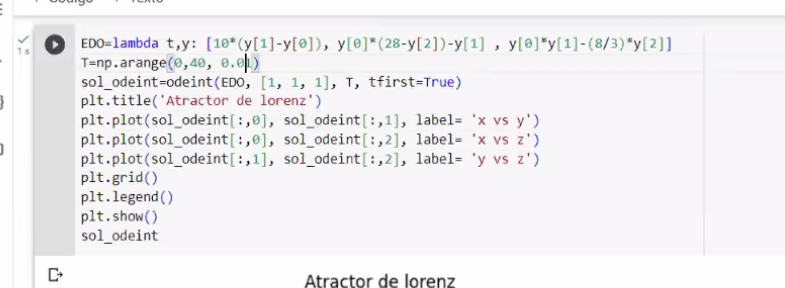

# Oscilador de van der Pol
${\displaystyle {d^{2}x \over dt^{2}}-\mu (1-x^{2}){dx \over dt}+x=0}$

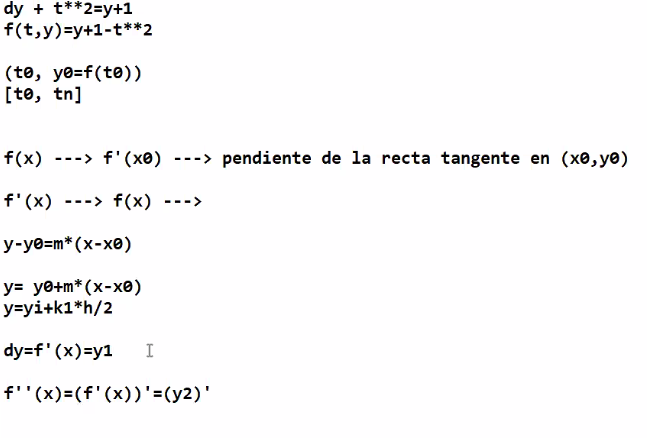

[[ 2.          0.        ]
 [ 1.99093338 -0.17265481]
 [ 1.96695252 -0.30072111]
 [ 1.93183209 -0.39739534]
 [ 1.88817772 -0.47284973]
 [ 1.83771915 -0.53452342]
 [ 1.78155292 -0.58775061]
 [ 1.72032135 -0.63637467]
 [ 1.65433584 -0.68324222]
 [ 1.58365714 -0.73057114]
 [ 1.50814417 -0.78021808]
 [ 1.42747983 -0.83387551]
 [ 1.34117957 -0.8932215 ]
 [ 1.24858669 -0.96003964]
 [ 1.14885665 -1.03631726]
 [ 1.04093275 -1.12432058]
 [ 0.92351598 -1.22663049]
 [ 0.79503487 -1.34609732]
 [ 0.65362726 -1.48562831]
 [ 0.49715789 -1.64764933]
 [ 0.32331668 -1.83297438]
 [ 0.12987491 -2.03871172]
 [-0.08478604 -2.25487424]
 [-0.32074732 -2.45993416]
 [-0.57519852 -2.61728393]
 [-0.84096605 -2.67747906]
 [-1.10582254 -2.59242656]
 [-1.35384398 -2.34085322]
 [-1.56926048 -1.94879513]
 [-1.74114948 -1.48342666]
 [-1.86607389 -1.0210604 ]
 [-1.94730728 -0.61592061]
 [-1.99193208 -0.29018707]
 [-2.00794059 -0.04196495]
 [-2.00246361  0.14216339]
 [-1.98111186  0.27809913]
 [-1.94797826  0.37989181]
 

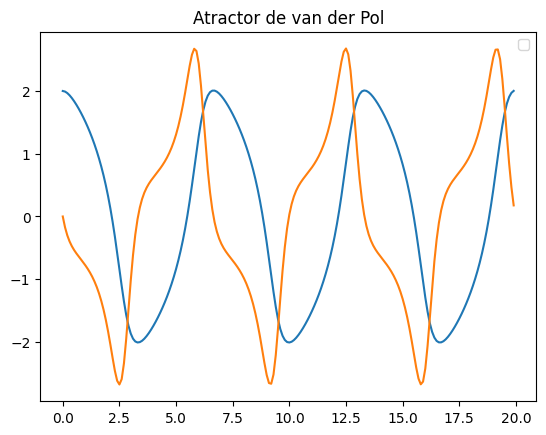

In [ ]:
EDO = lambda t,y: [y[1], (1 - y[0]**2)*y[1]-y[0]] #y es un vector y=[x,y,z]- [y[0],y[1],y[2]]
T = np.arange(0,20,0.1)
sol_odeint = odeint(EDO,[2,0],T,tfirst=True)

plt.title('Atractor de van der Pol')
plt.plot(T, sol_odeint[:, 0],T, sol_odeint[:, 1])
print(sol_odeint)
# plt.grid(True)
plt.legend()
plt.show()

#maximo 4 de primer orden

(0.8, 5.2) (0.7999999999999998, 27.2)


<ipython-input-1-6c59d6b1c5cc>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb,_,_,_=np.linalg.lstsq(X,Y)
<ipython-input-1-6c59d6b1c5cc>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mb,_,_,_=np.linalg.lstsq(X,Y)


((0.8, 5.2), (0.7999999999999998, 27.2))

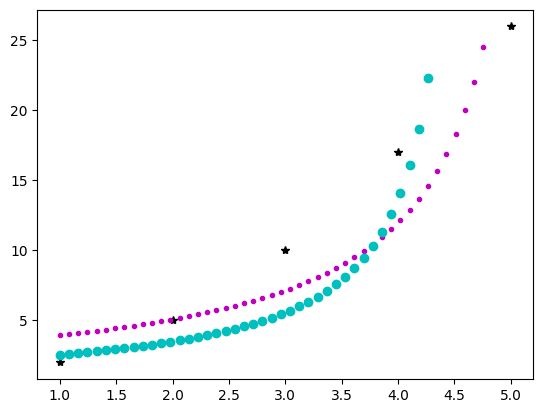

In [1]:
#Autor: Profesor Alfonso Mancilla
import numpy as np, matplotlib.pyplot as plt
#1. Datos de entrada y ecuaciones de las curvas que se ajustarán
x=np.array([1,2,3,4,5])
y=np.array([2, 5, 10, 17, 26])
y1calc=lambda x,C,D: D/(x+C); y2calc=lambda x,A,B: 1/(A*x+B)
#2. Transformación. "Linealización de las curvas"
X=np.multiply(x, y); Y=y
#3. Aumentar X con un vector de unos
X=(np.array([np.ones(len(x)), X])).T
# 4. Aplicar mínimos cuadrados para obtener los parámetros de la linealización del modelo
#p, res, rnk, s = lstsq(M, y)
mb,_,_,_=np.linalg.lstsq(X,Y)
#5. Obtención de la pendiente y el intercepto de la recta obtenida por mínimos cuadrados
b=mb[0]; m=mb[1]
# 6. Obtener los parámetros de la curva ajustada, en función de $m$ y $b$, con las ecuaciones de la linealización
C=-1/m; D=C*b
# Modelo2
X=x; Y=1/y
X=(np.array([np.ones(len(x)), x])).T
mb,_,_,_=np.linalg.lstsq(X,Y)
b=mb[0]
m=mb[1]
# Equivalencias Modelo2
A=m
B=b
# 7. Gráficas. Puntos, curvas ajustadas, recta de regresión, polinomiio de interpolación y otras
ejex=np.linspace(min(x),max(x))

fig, ax = plt.subplots()
ax.plot(x,y,'*k');xl=plt.xlim();yl=plt.ylim()
print(plt.xlim(),plt.ylim())
ax.plot(ejex,y1calc(ejex,C,D),'.m',ejex,y2calc(ejex,A,B),'oc');
plt.xlim(xl),plt.ylim(yl)

[[1.00000000e-002]
 [1.96075296e-002]
 [2.88381694e-002]
 [3.77064184e-002]
 [4.62260954e-002]
 [5.44103680e-002]
 [6.22718069e-002]
 [6.98224138e-002]
 [7.70736548e-002]
 [8.40364890e-002]
 [9.07213880e-002]
 [9.71383869e-002]
 [1.03297104e-001]
 [1.09206735e-001]
 [1.14876110e-001]
 [1.20313690e-001]
 [1.25527604e-001]
 [1.30525654e-001]
 [1.35315341e-001]
 [1.39903872e-001]
 [1.44298183e-001]
 [1.48504949e-001]
 [1.52530601e-001]
 [1.56381334e-001]
 [1.60063118e-001]
 [1.63581709e-001]
 [1.66942668e-001]
 [1.70151363e-001]
 [1.73212979e-001]
 [1.76132528e-001]
 [1.78914858e-001]
 [1.81564661e-001]
 [1.84086478e-001]
 [1.86484709e-001]
 [1.88763619e-001]
 [1.90927342e-001]
 [1.92979891e-001]
 [1.94925161e-001]
 [1.96766936e-001]
 [1.98508895e-001]
 [2.00154612e-001]
 [2.01707568e-001]
 [2.03171149e-001]
 [2.04548655e-001]
 [2.05843303e-001]
 [2.07058229e-001]
 [2.08196493e-001]
 [2.09261085e-001]
 [2.10254926e-001]
 [2.11180868e-001]
 [2.12041705e-001]
 [2.12840170e-001]
 [2.13578941

IndexError: ignored

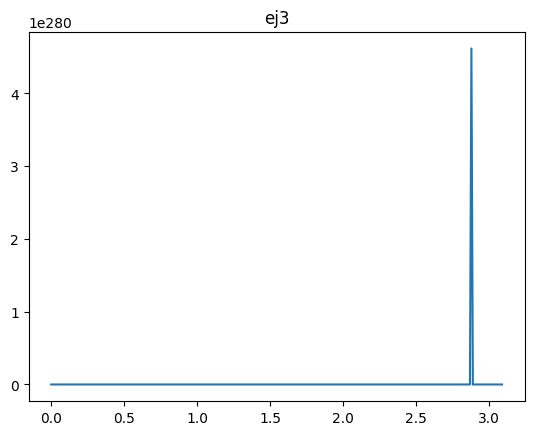

In [8]:
from scipy.integrate import odeint, solve_ivp
EDO = lambda t,y: (t+y-1)**2 #t+1] #una literalmente, varias en una lista
T = np.arange(0,3.1,0.01)
sol_odeint = odeint(EDO,0.01,T,tfirst=True)
print(sol_odeint)
plt.title('ej3')
plt.plot(T, sol_odeint[:,0],label= 'x vs y')
plt.plot(T, sol_odeint[:,1], label = 'x vs z')
plt.legend()
plt.show()

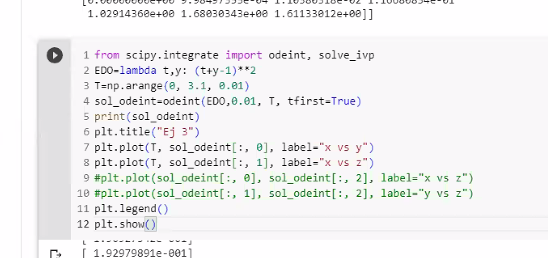

In [11]:
from scipy.integrate import odeint, solve_ivp
EDO = lambda t,y: (t+y-1)**2
T = np.arange(0,3.1,0.01)
sol_odeint = odeint(EDO,0.01,T,tfirst=True)
print(sol_odeint)
#faltan las graficas

[[1.00000000e-002]
 [1.96075296e-002]
 [2.88381694e-002]
 [3.77064184e-002]
 [4.62260954e-002]
 [5.44103680e-002]
 [6.22718069e-002]
 [6.98224138e-002]
 [7.70736548e-002]
 [8.40364890e-002]
 [9.07213880e-002]
 [9.71383869e-002]
 [1.03297104e-001]
 [1.09206735e-001]
 [1.14876110e-001]
 [1.20313690e-001]
 [1.25527604e-001]
 [1.30525654e-001]
 [1.35315341e-001]
 [1.39903872e-001]
 [1.44298183e-001]
 [1.48504949e-001]
 [1.52530601e-001]
 [1.56381334e-001]
 [1.60063118e-001]
 [1.63581709e-001]
 [1.66942668e-001]
 [1.70151363e-001]
 [1.73212979e-001]
 [1.76132528e-001]
 [1.78914858e-001]
 [1.81564661e-001]
 [1.84086478e-001]
 [1.86484709e-001]
 [1.88763619e-001]
 [1.90927342e-001]
 [1.92979891e-001]
 [1.94925161e-001]
 [1.96766936e-001]
 [1.98508895e-001]
 [2.00154612e-001]
 [2.01707568e-001]
 [2.03171149e-001]
 [2.04548655e-001]
 [2.05843303e-001]
 [2.07058229e-001]
 [2.08196493e-001]
 [2.09261085e-001]
 [2.10254926e-001]
 [2.11180868e-001]
 [2.12041705e-001]
 [2.12840170e-001]
 [2.13578941

In [39]:
from scipy.integrate import odeint, solve_ivp
EDO = lambda t,y: (t+y-1)**2
T = np.arange(0,3.1,0.01)
sol_odeint = odeint(EDO,0.5,T,tfirst=True)
plt.plot(T, sol_odeint[:,0], sol_odeint[:,1])
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


IndexError: ignored

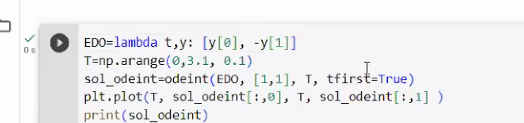

d2y+y==0
[0 3]
[-1 1]

In [ ]:
# EDO = lambda t,y: [y[1]-4, y[1]] #y es un vector y=[x,y,z]- [y[0],y[1],y[2]]
# T = np.arange(0,20,0.1)
# sol_odeint = odeint(EDO,[2,0],T,tfirst=True)

# plt.title('Atractor de van der Pol')
# plt.plot(T, sol_odeint[:, 0],T, sol_odeint[:, 1])
# print(sol_odeint)
# # plt.grid(True)
# plt.legend()
# plt.show()

# #maximo 4 de primer orden

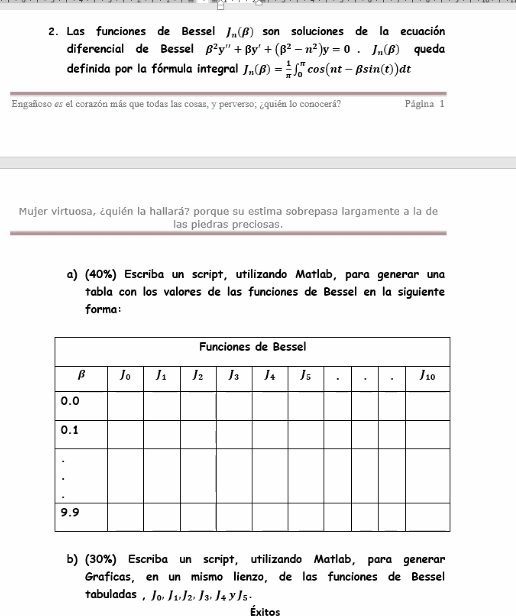

In [34]:
import numpy as np
from scipy import integrate

Col0=np.arange(0,10,0.1)
Fil0=np.arange(0,11,1)
nc=Fil0.size
nf=Col0.size
B= np.zeros((nf+1, nc+1))
B[0,1:]=Fil0
B[1:,0]=Col0
B
for i in range(1,nf+1):
  for j in range(1,nc+1):
    B[i,j]= sc.special.jv(B[0,j],B[i,0])
for i in range(nf + 1):
    for j in range(nc + 1):
        print(f'{B[i,j]:.4f}', end='\t')
    print()

0.0000	0.0000	1.0000	2.0000	3.0000	4.0000	5.0000	6.0000	7.0000	8.0000	9.0000	10.0000	
0.0000	1.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.1000	0.9975	0.0499	0.0012	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.2000	0.9900	0.0995	0.0050	0.0002	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.3000	0.9776	0.1483	0.0112	0.0006	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.4000	0.9604	0.1960	0.0197	0.0013	0.0001	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.5000	0.9385	0.2423	0.0306	0.0026	0.0002	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.6000	0.9120	0.2867	0.0437	0.0044	0.0003	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.7000	0.8812	0.3290	0.0588	0.0069	0.0006	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.8000	0.8463	0.3688	0.0758	0.0102	0.0010	0.0001	0.0000	0.0000	0.0000	0.0000	0.0000	
0.9000	0.8075	0.4059	0.0946	0.0144	0.0016	0.0001	0.0000	0.0000	0.0000	0.0000	0.0000	
1.0000	0.7652	0.4401	0.1149	0.0196	0.0025	0.0002	0.0000	0.0000	0

#Grafica


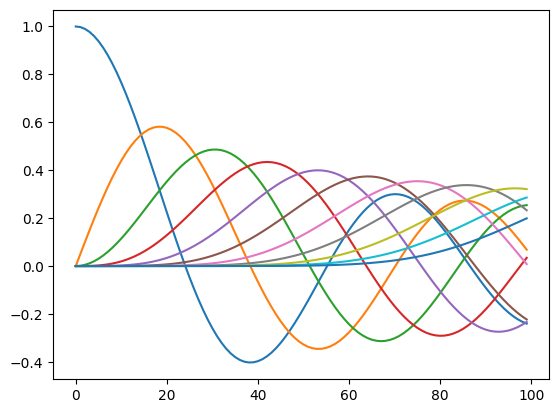

In [37]:
import matplotlib.pyplot as plt
plt.plot(B[1:,1:])